## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data.loc[combined_data['Mouse ID'] == 'g989', :]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.loc[combined_data['Mouse ID'].isin(duplicate_mice) == False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
clean_data = len(clean_df['Mouse ID'].unique())
clean_data

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_reg = clean_df.groupby(['Drug Regimen'])
drug_reg

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_table = pd.DataFrame({'Mean Tumor Volume' : drug_reg['Tumor Volume (mm3)'].mean(),
                        'Median Tumor Volume' : drug_reg['Tumor Volume (mm3)'].median(),
                        'Tumor Volume Variance' : drug_reg['Tumor Volume (mm3)'].var(),
                        'Tumor Volume Std Dev' : drug_reg['Tumor Volume (mm3)'].std(),
                        'Tumor Volume SEM' : drug_reg['Tumor Volume (mm3)'].sem()})

summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
drug_reg = clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
drug_reg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
drug_reg = clean_df['Drug Regimen'].value_counts()
df_drug = pd.DataFrame(drug_reg)
df_drug

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Ceftamin,178
Infubinol,178
Propriva,148


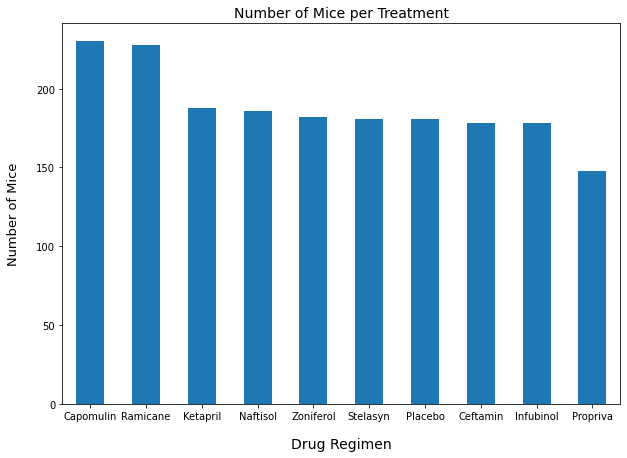

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
clean_df['Drug Regimen'].value_counts().plot(kind='bar', figsize=(10,7), rot=0)
plt.xlabel('Drug Regimen', labelpad=16, fontsize=14)
plt.ylabel('Number of Mice', labelpad=16, fontsize=13)
plt.title('Number of Mice per Treatment', fontsize=14);

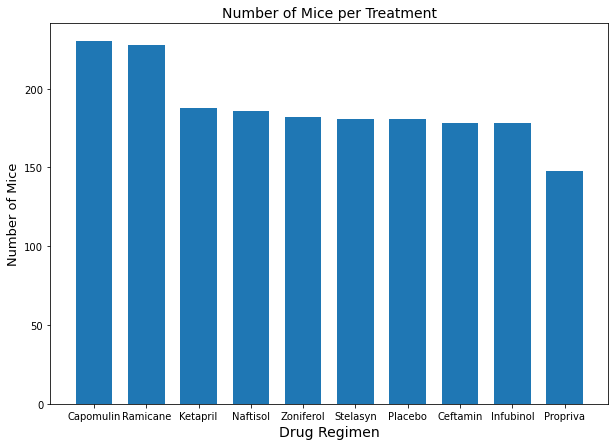

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_reg = clean_df['Drug Regimen'].value_counts()
fig = plt.figure(figsize=(10,7))
plt.bar(drug_reg.index,drug_reg.values, width=0.7)
plt.title(label='Number of Mice per Treatment', fontsize=14)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Number of Mice', fontsize=13);

In [34]:
sex_count = clean_df['Sex'].value_counts()
sex_count

Male      958
Female    922
Name: Sex, dtype: int64

In [35]:
sex_count.index

Index(['Male', 'Female'], dtype='object')

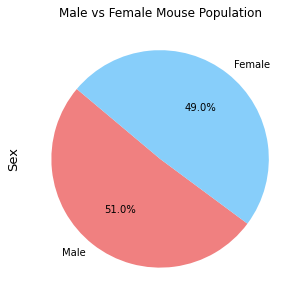

In [36]:
# Find Mouse gender 
colors = ['lightcoral', 'lightskyblue']
sex_count = clean_df['Sex'].value_counts().plot(kind='pie', figsize=(7,5), autopct="%1.1f%%", colors = colors, startangle=140)
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.ylabel('Sex', fontsize=13)
plt.title('Male vs Female Mouse Population');

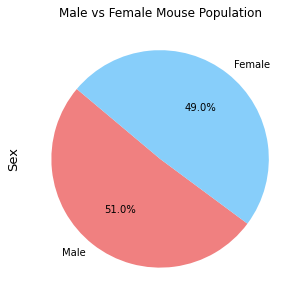

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['lightcoral', 'lightskyblue']
sex_count  = clean_df['Sex'].value_counts()
fig = plt.figure(figsize=(7,5))
plt.pie(sex_count, labels=sex_count.index, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title('Male vs Female Mouse Population',fontsize = 12)
plt.ylabel('Sex', fontsize =13);

## Quartiles, Outliers and Boxplots

In [38]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
mouse_group = clean_df.groupby('Mouse ID')

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_group['Timepoint'].max()
mouse_df = last_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_merge = pd.merge(mouse_df, clean_df, how = 'left', on = ['Mouse ID', 'Timepoint'] )
df_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    tumor_data = df_merge.loc[df_merge['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_list.append(tumor_data)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = tumor_data.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    # add subset 
    lower_bound = lowerq - (1.5 * iqr)   
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers using upper and lower bounds
    outlier = tumor_data.loc[(tumor_data < lower_bound) | (tumor_data > upper_bound)]   

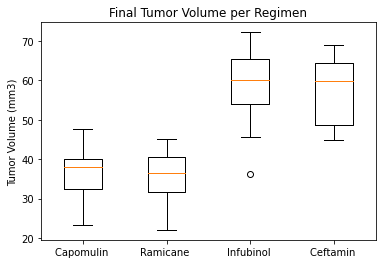

In [40]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_xticklabels(['Capomulin ', 'Ramicane ', 'Infubinol ', 'Ceftamin '])
ax1.set_title('Final Tumor Volume per Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_list);

## Line and Scatter Plots

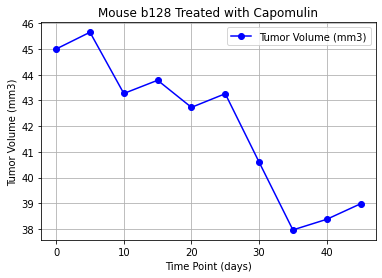

In [41]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == 'Capomulin']
capomulin_mouse = capomulin_df[capomulin_df["Mouse ID"] == 'b128']
capomulin_mouse = capomulin_mouse.set_index('Timepoint')

capomulin_tumor = pd.DataFrame(capomulin_mouse['Tumor Volume (mm3)'])

capomulin_tumor.plot(color = 'blue', marker= "o")
plt.title('Mouse b128 Treated with Capomulin')
plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True);

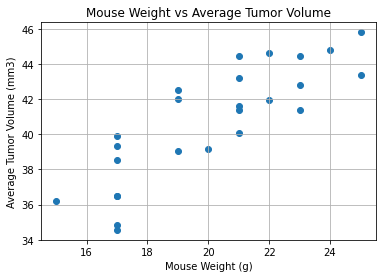

In [42]:
#Create a new groub by to combine mouse IDs and to calculate the avg for 'Tumor Volume (mm3)' & 'Weight (g)
capomulin_weight = capomulin_df.groupby('Mouse ID').mean()[['Tumor Volume (mm3)','Weight (g)']]

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(capomulin_weight['Weight (g)'],capomulin_weight['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True);

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


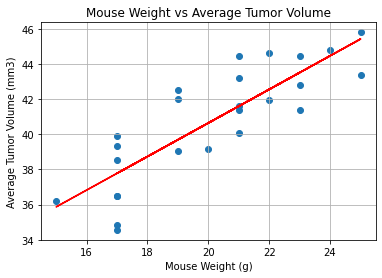

In [43]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_weight['Weight (g)']
y_values = capomulin_weight['Tumor Volume (mm3)']

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#calculate regress values to plot linear regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Generate a scatter plot of mouse weight versus average tumor volume and a linear regression line for the Capomulin regimen
plt.plot(x_values,regress_values,"r-")
plt.scatter(capomulin_weight['Weight (g)'],capomulin_weight['Tumor Volume (mm3)'])
plt.title('Mouse Weight vs Average Tumor Volume')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True);